In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
df = pd.read_csv("./df_min_max.csv")

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.452381,1.0,1.0,0.910394,0.5,0.035714,0.25,0.8,0.0,0.000000,...,0.333333,0.0,0.0,0.250000,0.666667,0.666667,0.000000,0.000000,0.000000,0.000000
1,0.357143,0.0,0.5,0.924014,0.5,0.071429,0.75,0.2,0.0,0.000484,...,0.666667,0.0,0.0,0.285714,0.666667,0.666667,0.444444,0.500000,0.428571,0.000000
2,0.333333,0.0,0.5,0.646595,0.5,0.035714,0.25,0.2,0.0,0.001938,...,0.666667,0.0,0.0,0.285714,0.333333,0.333333,0.388889,0.500000,0.428571,0.461538
3,0.428571,0.0,1.0,0.857348,0.5,0.928571,0.50,0.6,0.0,0.004360,...,0.333333,0.0,1.0,0.607143,0.666667,0.333333,0.388889,0.500000,1.000000,0.538462
4,0.261905,0.0,1.0,0.035842,0.5,0.500000,0.25,0.2,0.0,0.005329,...,1.000000,0.0,0.0,0.357143,0.666667,0.666667,0.500000,0.357143,0.000000,0.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,0.309524,0.0,0.0,0.159140,0.5,0.142857,0.50,0.6,0.0,0.994671,...,0.333333,0.0,0.0,0.357143,0.333333,0.666667,0.500000,0.285714,0.142857,0.538462
775,0.190476,0.0,1.0,0.762724,1.0,0.142857,0.50,0.8,0.0,0.996124,...,1.000000,0.0,0.0,0.178571,0.333333,0.666667,0.222222,0.142857,0.000000,0.000000
776,0.428571,0.0,0.5,0.559857,0.5,0.785714,0.25,0.6,0.0,0.996609,...,0.666667,0.0,0.5,0.607143,0.666667,0.666667,0.277778,0.142857,0.000000,0.230769
777,0.738095,0.0,0.5,0.659498,1.0,0.035714,0.50,0.6,0.0,0.998547,...,1.000000,0.0,0.0,0.607143,0.666667,0.333333,0.500000,0.428571,0.000000,0.615385


In [4]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Attrition'].abs()
selected_columns = correlation_with_target[correlation_with_target > 0.1].index
print(f'Selected columns with abs(correlation) > 0.1: {selected_columns.tolist()}')
df_filtered = df[selected_columns]

Selected columns with abs(correlation) > 0.1: ['Age', 'Attrition', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'MaritalStatus', 'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']


In [7]:
X = df_filtered.drop('Attrition', axis=1)
y = df_filtered['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

In [13]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    print(f'\nClassification Report for {model.__class__.__name__}:\n')
    print(classification_report(y_test, y_pred))
    
    metrics["Model"].append(model.__class__.__name__)
    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Precision"].append(report.get("weighted avg", {}).get("precision", 0))
    metrics["Recall"].append(report.get("weighted avg", {}).get("recall", 0))
    metrics["F1-Score"].append(report.get("weighted avg", {}).get("f1-score", 0))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


Evaluating Logistic Regression...

Classification Report for LogisticRegression:

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       131
         1.0       0.80      0.32      0.46        25

    accuracy                           0.88       156
   macro avg       0.84      0.65      0.69       156
weighted avg       0.87      0.88      0.86       156



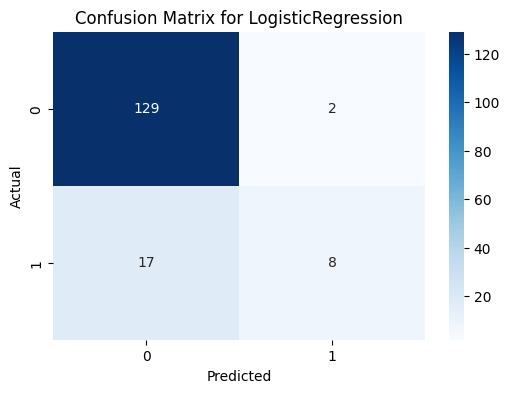


Evaluating Random Forest...

Classification Report for RandomForestClassifier:

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92       131
         1.0       0.70      0.28      0.40        25

    accuracy                           0.87       156
   macro avg       0.79      0.63      0.66       156
weighted avg       0.85      0.87      0.84       156



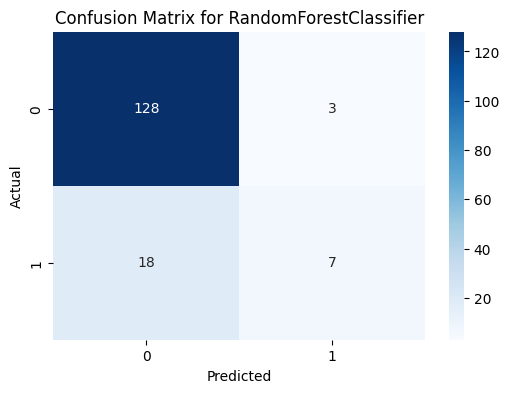


Evaluating SVM...

Classification Report for SVC:

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92       131
         1.0       0.70      0.28      0.40        25

    accuracy                           0.87       156
   macro avg       0.79      0.63      0.66       156
weighted avg       0.85      0.87      0.84       156



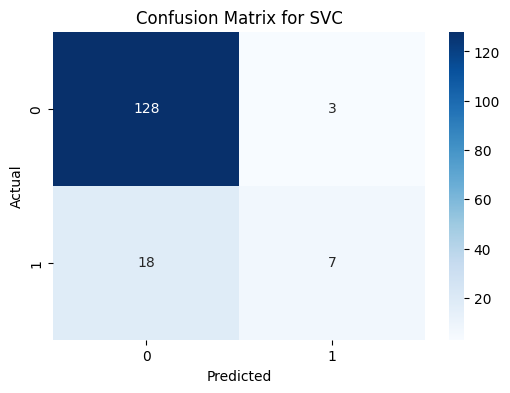


Evaluating Decision Tree...

Classification Report for DecisionTreeClassifier:

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       131
         1.0       0.21      0.16      0.18        25

    accuracy                           0.77       156
   macro avg       0.53      0.52      0.52       156
weighted avg       0.74      0.77      0.76       156



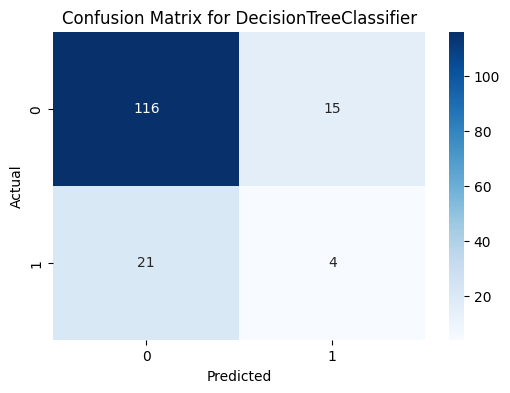


Evaluating K-Nearest Neighbors...

Classification Report for KNeighborsClassifier:

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92       131
         1.0       0.58      0.28      0.38        25

    accuracy                           0.85       156
   macro avg       0.73      0.62      0.65       156
weighted avg       0.83      0.85      0.83       156



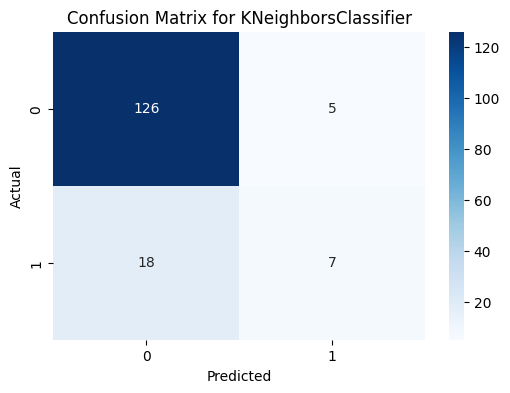

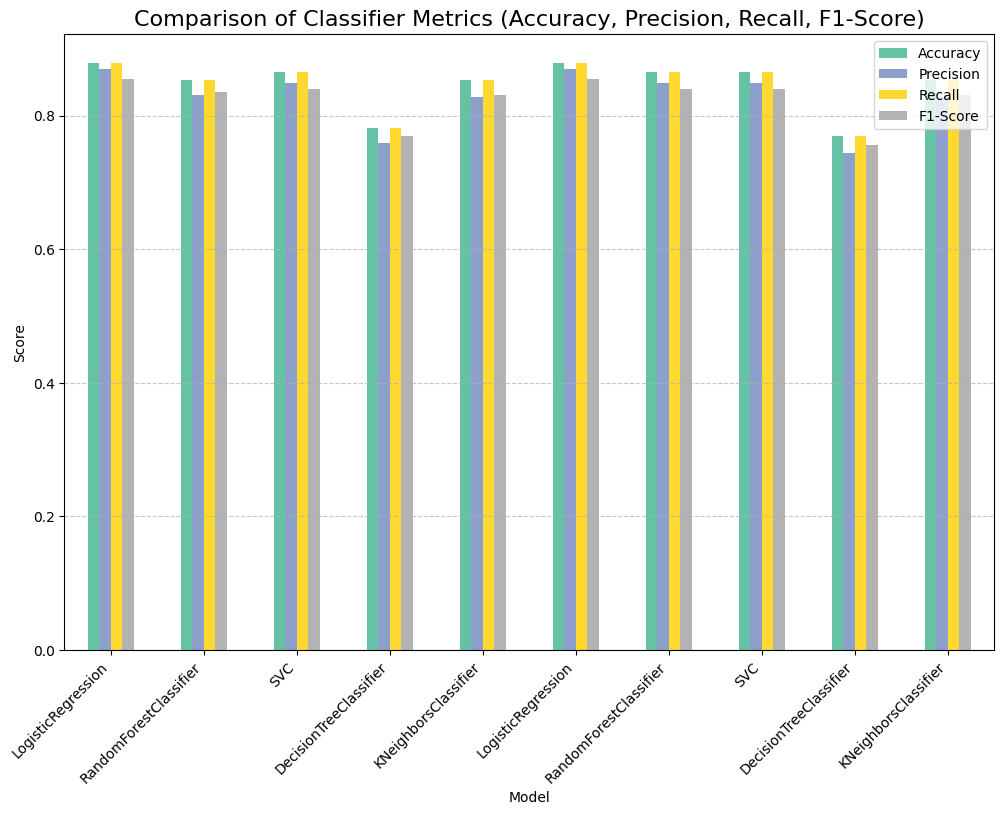

In [14]:
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    evaluate_model(model, X_train, X_test, y_train, y_test)

metrics_df = pd.DataFrame(metrics)

if not metrics_df.empty:
    metrics_df.set_index("Model").plot(kind="bar", figsize=(12, 8), colormap='Set2')
    plt.title('Comparison of Classifier Metrics (Accuracy, Precision, Recall, F1-Score)', fontsize=16)
    plt.ylabel('Score')
    plt.xticks(rotation=45, ha="right")
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("No metrics to display.")